In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('shop.csv')

In [3]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format="%d/%m/%Y")

In [8]:
df.sort_values(by='invoice_date', ascending=True)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
36199,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,2021-01-01,Metrocity
78539,I313757,C438201,Female,43,Clothing,4,1200.32,Credit Card,2021-01-01,Mall of Istanbul
27812,I836951,C382440,Male,54,Clothing,3,900.24,Cash,2021-01-01,Metrocity
27856,I159235,C312481,Male,58,Food & Beverage,4,20.92,Credit Card,2021-01-01,Mall of Istanbul
5323,I115941,C105769,Male,34,Clothing,1,300.08,Cash,2021-01-01,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
20863,I218048,C389917,Female,66,Clothing,5,1500.40,Cash,2023-03-08,Mall of Istanbul
20879,I268432,C175797,Female,37,Food & Beverage,3,15.69,Cash,2023-03-08,Kanyon
61644,I200744,C224026,Female,59,Cosmetics,5,203.30,Credit Card,2023-03-08,Kanyon
27871,I124836,C265661,Female,46,Shoes,3,1800.51,Credit Card,2023-03-08,Metrocity


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [10]:
df['Year'] = df['invoice_date'].dt.year

In [11]:
df['Month'] = df['invoice_date'].dt.month

#### What are the most purchased products by customers?

In [12]:
products_sold_yearly = df.groupby('Year')['quantity'].sum()
print("Number of products sold each year:")
print(products_sold_yearly)

Number of products sold each year:
Year
2021    136096
2022    137147
2023     25469
Name: quantity, dtype: int64


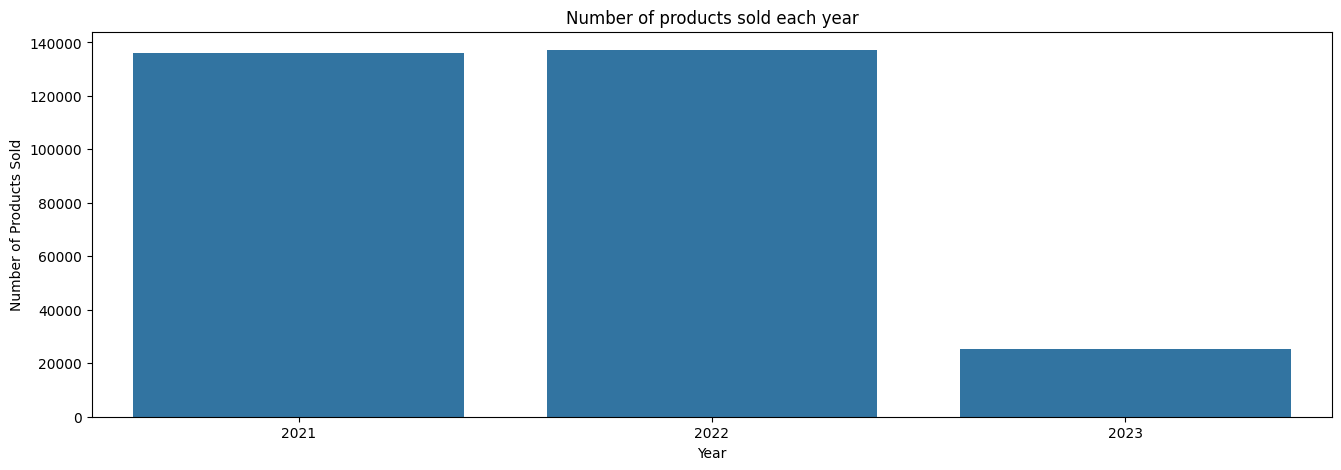

In [13]:
plt.figure(figsize=(16, 5))
sns.barplot(x=products_sold_yearly.index, y=products_sold_yearly.values)
plt.title('Number of products sold each year')
plt.xlabel('Year')
plt.ylabel('Number of Products Sold')
plt.show()

#### What products are most purchased by customers?

In [14]:
product = df.groupby('category')['quantity'].sum().sort_values(ascending=False).head(5)
print("The most popular product categories among customers:")
print(product)

The most popular product categories among customers:
category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Toys                30321
Shoes               30217
Name: quantity, dtype: int64


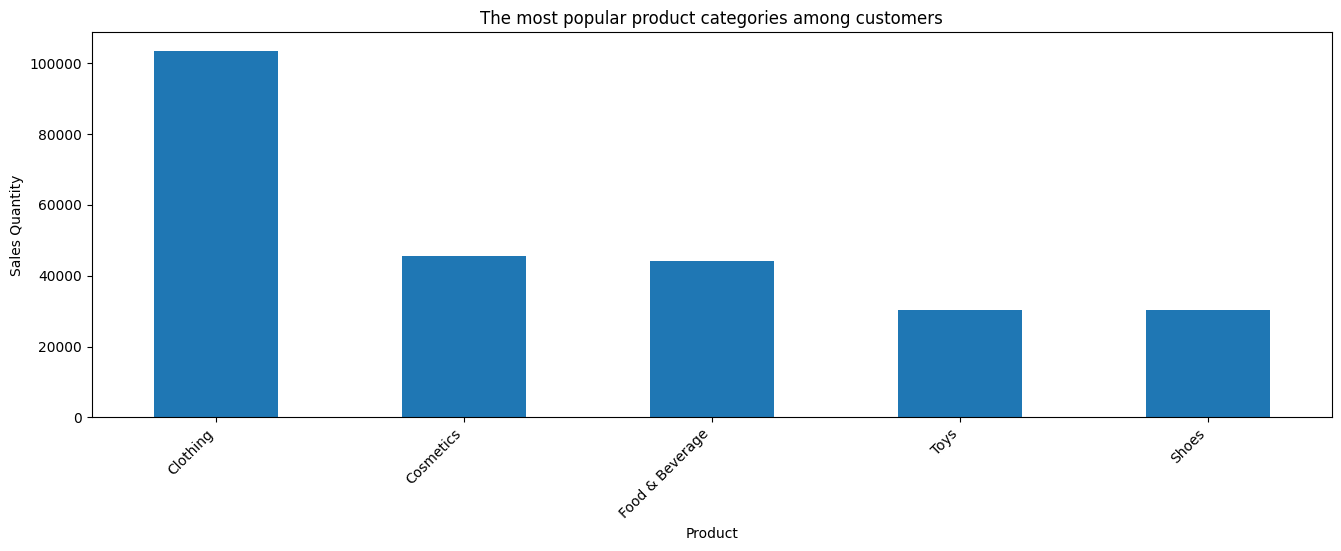

In [15]:
plt.figure(figsize=(16, 5))
product.plot(kind='bar')
plt.title('The most popular product categories among customers')
plt.xlabel('Product')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45, ha='right')
plt.show()

#### How much money do customers spend each month per year?

In [16]:
df['total'] = df['quantity'] * df['price']

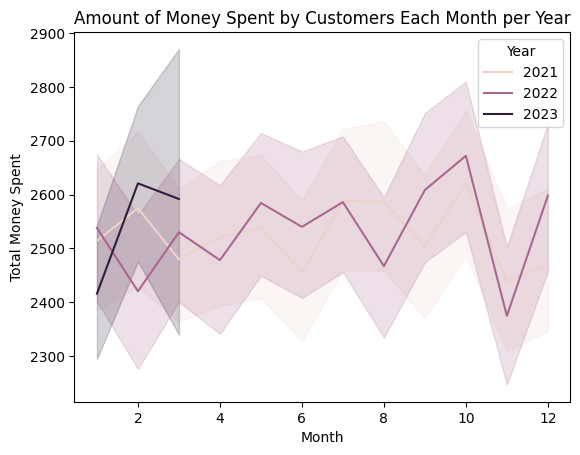

In [17]:
sns.lineplot(
    x="Month",
    y="total",
    hue="Year",
    data=df)
plt.title('Amount of Money Spent by Customers Each Month per Year')
plt.xlabel('Month')
plt.ylabel('Total Money Spent')
plt.show()

#### What payment methods do customers use most often?

In [18]:
payment = df['payment_method'].value_counts()

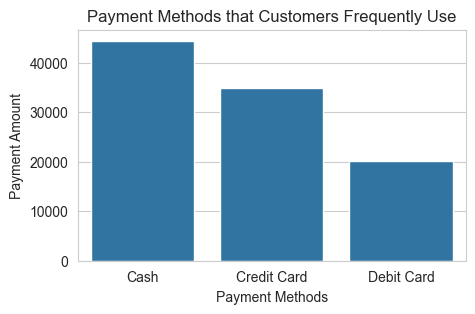

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(5, 3))
sns.barplot(x=payment.index, y=payment.values)
plt.title('Payment Methods that Customers Frequently Use')
plt.xlabel('Payment Methods')
plt.ylabel('Payment Amount')
plt.show()

#### Is there a difference between the amount spent based on gender?

<Axes: xlabel='Year', ylabel='total'>

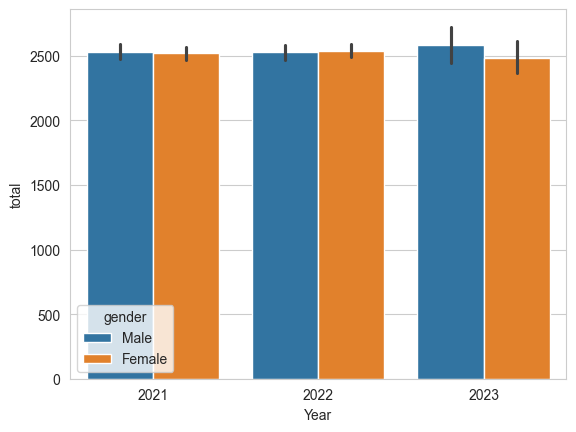

In [20]:
sns.barplot(x='Year', y='total', hue='gender', data=df)